In [63]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

In [64]:
load_dotenv()
model = ChatOpenAI()

In [65]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    score: str

In [66]:
def create_outline(state: BlogState) -> BlogState:
    
    # fetch title
    title = state['title'] 

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topi - {title}'
    outline = model.invoke(prompt).content
    
    # update state
    state['outline'] = outline

    return state

In [67]:
def create_blog (state: BlogState) -> BlogState:
    
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the following outline \n {outline}'
    
    content = model.invoke(prompt).content

    state['content'] = content

    return state


In [68]:
def blog_score(state: BlogState) -> BlogState:

    content = state['content']

    prompt = f'Based on this blog content - {content} score my blog out of 10'

    score = model.invoke(prompt).content
    
    state['score'] = score

    return state

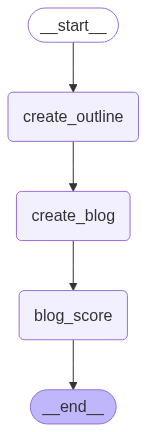

In [69]:
# create graph
graph = StateGraph(BlogState)

# add nodes 
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('blog_score', blog_score)

# add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','blog_score')
graph.add_edge('blog_score', END)

# compile the graph
workflow = graph.compile()
workflow

In [70]:
# execute the graph
initial_state = {'title': 'Rise of AI in Bangladesh'}
final_state = workflow.invoke(initial_state)
print(final_state)

{'title': 'Rise of AI in Bangladesh', 'outline': 'I. Introduction\n    A. Brief overview of artificial intelligence (AI)\n    B. Importance of AI in modern society\n    C. Introduction to the rise of AI in Bangladesh\n\nII. Historical Background of AI in Bangladesh\n    A. Early adoption of AI technologies in Bangladesh\n    B. Government initiatives to promote AI research and development\n    C. Growth of AI startups in Bangladesh\n\nIII. Current Applications of AI in Bangladesh\n    A. AI in healthcare\n        1. Use of AI for disease diagnosis and treatment\n        2. Development of AI-powered healthcare solutions\n    B. AI in agriculture\n        1. Use of AI for crop monitoring and management\n        2. Implementation of AI in agricultural machinery\n    C. AI in finance\n        1. Use of AI for fraud detection and risk assessment\n        2. Adoption of AI in banking and financial institutions\n\nIV. Challenges and Opportunities in the Rise of AI in Bangladesh\n    A. Lack o

In [71]:
print(final_state['title'])

Rise of AI in Bangladesh


In [72]:
print(final_state['score'])

I would rate this blog content a 9 out of 10. It provides a thorough overview of the rise of AI in Bangladesh, covering historical background, current applications, challenges, opportunities, future outlook, and a call to action. The content is well-organized and provides valuable insights into the impact of AI in Bangladesh. It could benefit from more specific examples or case studies to illustrate the points made, but overall it is informative and well-written.


In [73]:
print(final_state['outline'])

I. Introduction
    A. Brief overview of artificial intelligence (AI)
    B. Importance of AI in modern society
    C. Introduction to the rise of AI in Bangladesh

II. Historical Background of AI in Bangladesh
    A. Early adoption of AI technologies in Bangladesh
    B. Government initiatives to promote AI research and development
    C. Growth of AI startups in Bangladesh

III. Current Applications of AI in Bangladesh
    A. AI in healthcare
        1. Use of AI for disease diagnosis and treatment
        2. Development of AI-powered healthcare solutions
    B. AI in agriculture
        1. Use of AI for crop monitoring and management
        2. Implementation of AI in agricultural machinery
    C. AI in finance
        1. Use of AI for fraud detection and risk assessment
        2. Adoption of AI in banking and financial institutions

IV. Challenges and Opportunities in the Rise of AI in Bangladesh
    A. Lack of skilled AI professionals in Bangladesh
    B. Infrastructure limitatio

In [74]:
print(final_state['content'])

The field of artificial intelligence (AI) has been rapidly evolving in recent years, revolutionizing numerous industries and changing the way we live and work. In modern society, AI has become increasingly important for streamlining processes, making informed decisions, and improving overall efficiency. One country that has seen a significant rise in the adoption of AI technologies is Bangladesh.

I. Introduction
A. Artificial intelligence refers to the simulation of human intelligence processes by machines, such as learning, reasoning, problem-solving, perception, and interaction with the environment.
B. AI is becoming increasingly important in modern society, with applications in various sectors including healthcare, agriculture, finance, and more.
C. Bangladesh has seen a rise in the adoption of AI technologies, with government initiatives, growth of AI startups, and advancements in AI research and development.

II. Historical Background of AI in Bangladesh
A. Bangladesh has been an